Used Dataset :https://drive.google.com/file/d/1vlK7fnZeyDhQunpLipNpj7TqnlBiM9M2/view?usp=drive_link

# **Problem Statement**


- Loan defaults are a growing challenge for financial institutions, leading to significant losses and inefficiencies. Traditional loan approval processes often fail to accurately assess borrower risks, contributing to high default rates. There is a need for an advanced predictive model that can leverage borrower data to improve decision-making and minimize financial risks

**OBJECTIVE**

- The objective of this project is to develop a machine learning model that predicts loan approvals based on borrower attributes such as income, credit history, and employment experience. This model aims to assist financial institutions in reducing default risks, improving decision-making efficiency, and ensuring fair lending practices.

**Problem Statement with Objectives**

Loan defaults pose a significant challenge for financial institutions, leading to financial losses and inefficiencies in the approval process. This project aims to address these challenges by leveraging machine learning techniques to predict loan approvals, thereby reducing risks and improving decision-making

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data set**

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


**Feature Descriptions:**

**Independent**

- Loan ID: A unique identifier for each loan application.
- Gender: The gender of the applicant (Male/Female).
- Married: The marital status of the applicant (Yes/No).
- Dependents: The number of dependents the applicant has.
- Education: The education level of the applicant (Graduate/Not Graduate).
- Self_Employed: Whether the applicant is self-employed (Yes/No).
- ApplicantIncome: The income of the applicant.
- CoapplicantIncome: The income of the coapplicant, if any.
- LoanAmount: The amount of money requested by the applicant.
- Loan_Amount_Term: The term of the loan in months.
- Credit_History: The credit history of the applicant (1/0).
-Property_Area: The area where the property is located (Rural/Urban/Semiurban).

**Target**

- Loan_Status: The status of the loan application (Y/N) - this is our target variable.

# **Basic Information about the dataset**

In [3]:
df.shape
print('The number of rows in this dataset is ',df.shape[0],' and columns are ',df.shape[1])

The number of rows in this dataset is  45000  and columns are  14


In [4]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [5]:
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
6702,22.0,female,Bachelor,64386.0,1,RENT,6000.0,EDUCATION,11.97,0.09,2.0,663,No,1
33563,24.0,male,Associate,139571.0,4,RENT,7527.0,HOMEIMPROVEMENT,10.16,0.05,4.0,674,Yes,0
24911,35.0,female,Doctorate,94691.0,13,MORTGAGE,10000.0,DEBTCONSOLIDATION,6.54,0.11,8.0,671,Yes,0
37149,34.0,male,Associate,35662.0,6,RENT,6000.0,EDUCATION,15.63,0.17,10.0,683,No,0
11477,23.0,male,Associate,91013.0,1,OWN,21000.0,PERSONAL,12.42,0.23,2.0,655,Yes,0


In [6]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [9]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## **Basic visualization**

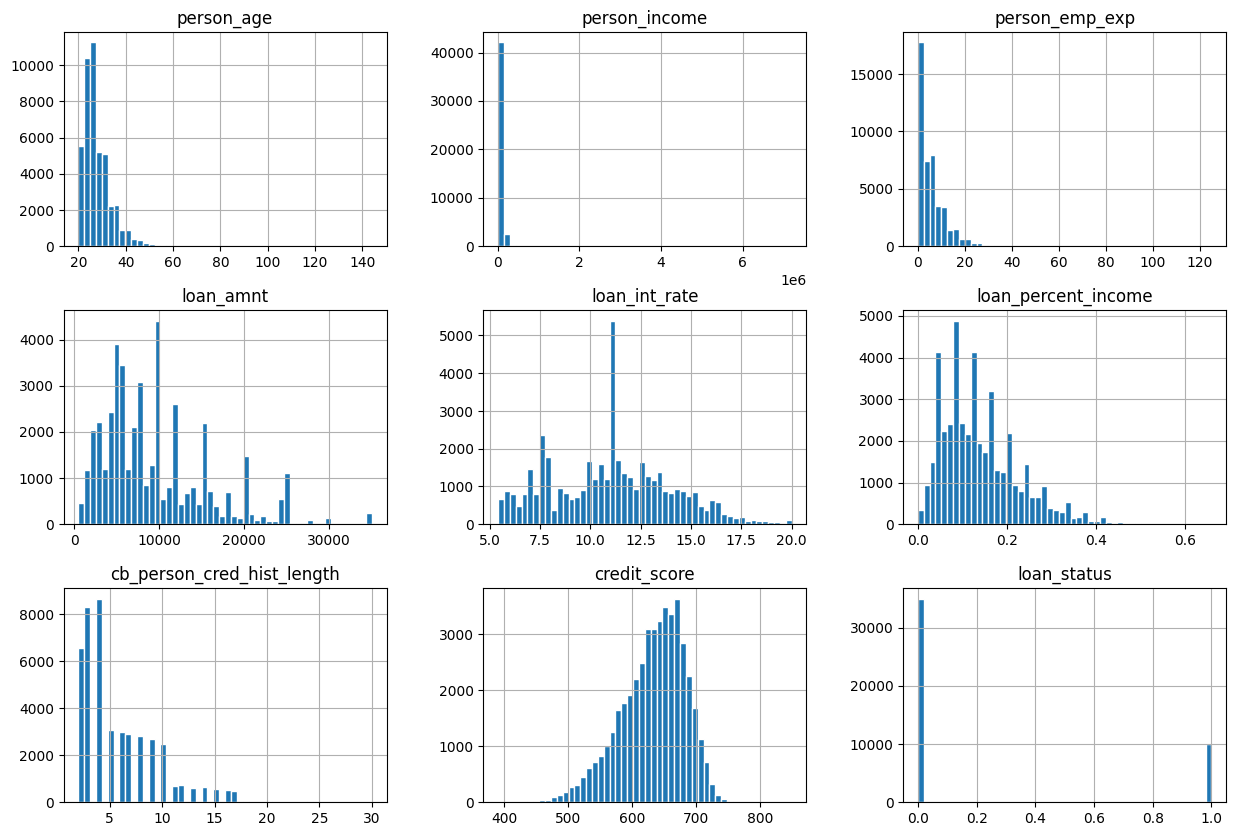

In [10]:
df.hist(figsize = (15,10), edgecolor = 'w', bins = 50)
plt.show()

# **Data Cleaning**

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['person_gender'] = labelencoder.fit_transform(df['person_gender'])
df['person_home_ownership'] = labelencoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = labelencoder.fit_transform(df['loan_intent'])

df['person_education'] = df['person_education'].replace({'Doctorate':5 ,'Master':4, 'Bachelor': 3, 'Associate': 2, 'High School': 1})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'No':0 ,'Yes':1})

<ipython-input-11-50d44790da7c>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_education'] = df['person_education'].replace({'Doctorate':5 ,'Master':4, 'Bachelor': 3, 'Associate': 2, 'High School': 1})
<ipython-input-11-50d44790da7c>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'No':0 ,'Yes':1})


**Changing the values of columns:**
  - **LabelEncoder** : 'person_gender', 'person_home_ownership', 'loan_intent' because these are categorical values with no Order.
  - **Replace** : 'person_education', 'previous_loan_defaults_on_file' because these are ordinal values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [13]:
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
18156,28.0,0,1,130842.0,4,3,25000.0,1,14.61,0.19,6.0,626,0,1
33000,28.0,0,4,66896.0,7,2,18000.0,4,13.75,0.27,6.0,658,1,0
7497,24.0,0,2,73058.0,3,3,6800.0,5,7.51,0.09,2.0,574,0,0
34592,32.0,0,4,77643.0,9,3,4881.0,5,10.80,0.06,10.0,697,1,0
23068,27.0,1,3,61188.0,5,3,8000.0,2,7.90,0.13,9.0,647,0,0


In [14]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


# **Imbalanced Data to Balanced Data**
---
Need to do oversampling to neutralize the count of loan_status

In [15]:

from imblearn.over_sampling import SMOTE   # Synthetic Minority Oversampling Technique

x= df.drop('loan_status', axis = 1)
y=df['loan_status']

smote = SMOTE(random_state = 42)

x_resampled, y_resampled = smote.fit_resample(x,y)

df=pd.concat([x_resampled, y_resampled], axis  =1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [16]:
# from imblearn.under_sampling import NearMiss   # Synthetic Minority Oversampling

# x= df.drop('loan_status', axis = 1)
# y=df['loan_status']

# NM = NearMiss(random_state = 42)

# x_resampled, y_resampled = NM.fit_resample(x,y)

# df=pd.concat([x_resampled, y_resampled], axis  =1)

In [17]:
df['loan_status'].value_counts()

,count
loan_status,
1,35000
0,35000


# **Data Correlation**

Checking the correlation to select the dta that are needed for furthur caluclation and for better modeling

In [18]:
df_corr = df.corr()
df_corr

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.019088,0.000502,0.184345,0.953146,-0.048661,0.063562,0.023766,0.017309,-0.046179,0.866956,0.177705,-0.007664,-0.028306
person_gender,0.019088,1.000000,0.036676,0.042579,0.026090,-0.043880,-0.013118,0.041373,-0.069965,-0.067572,0.013761,0.001649,0.124537,-0.178456
person_education,0.000502,0.036676,1.000000,0.030593,0.003272,-0.031967,-0.014156,0.032457,-0.044838,-0.061197,-0.003016,0.203089,0.059699,-0.128218
person_income,0.184345,0.042579,0.030593,1.000000,0.180614,-0.265818,0.259521,0.017946,0.005669,-0.258516,0.126089,0.031232,0.120451,-0.186747
person_emp_exp,0.953146,0.026090,0.003272,0.180614,1.000000,-0.050629,0.051456,0.031142,0.008383,-0.054915,0.828811,0.186444,0.009171,-0.055592
person_home_ownership,-0.048661,-0.043880,-0.031967,-0.265818,-0.050629,1.000000,-0.100095,-0.006748,0.110094,0.235116,-0.033719,0.003413,-0.183342,0.264358
loan_amnt,0.063562,-0.013118,-0.014156,0.259521,0.051456,-0.100095,1.000000,-0.014309,0.151222,0.586702,0.054665,0.010327,-0.084562,0.120961
loan_intent,0.023766,0.041373,0.032457,0.017946,0.031142,-0.006748,-0.014309,1.000000,-0.063763,-0.021875,0.024698,0.018009,0.118397,-0.170776
loan_int_rate,0.017309,-0.069965,-0.044838,0.005669,0.008383,0.110094,0.151222,-0.063763,1.000000,0.085363,0.020246,0.013303,-0.277864,0.397588
loan_percent_income,-0.046179,-0.067572,-0.061197,-0.258516,-0.054915,0.235116,0.586702,-0.021875,0.085363,1.000000,-0.030888,-0.007001,-0.279190,0.405947


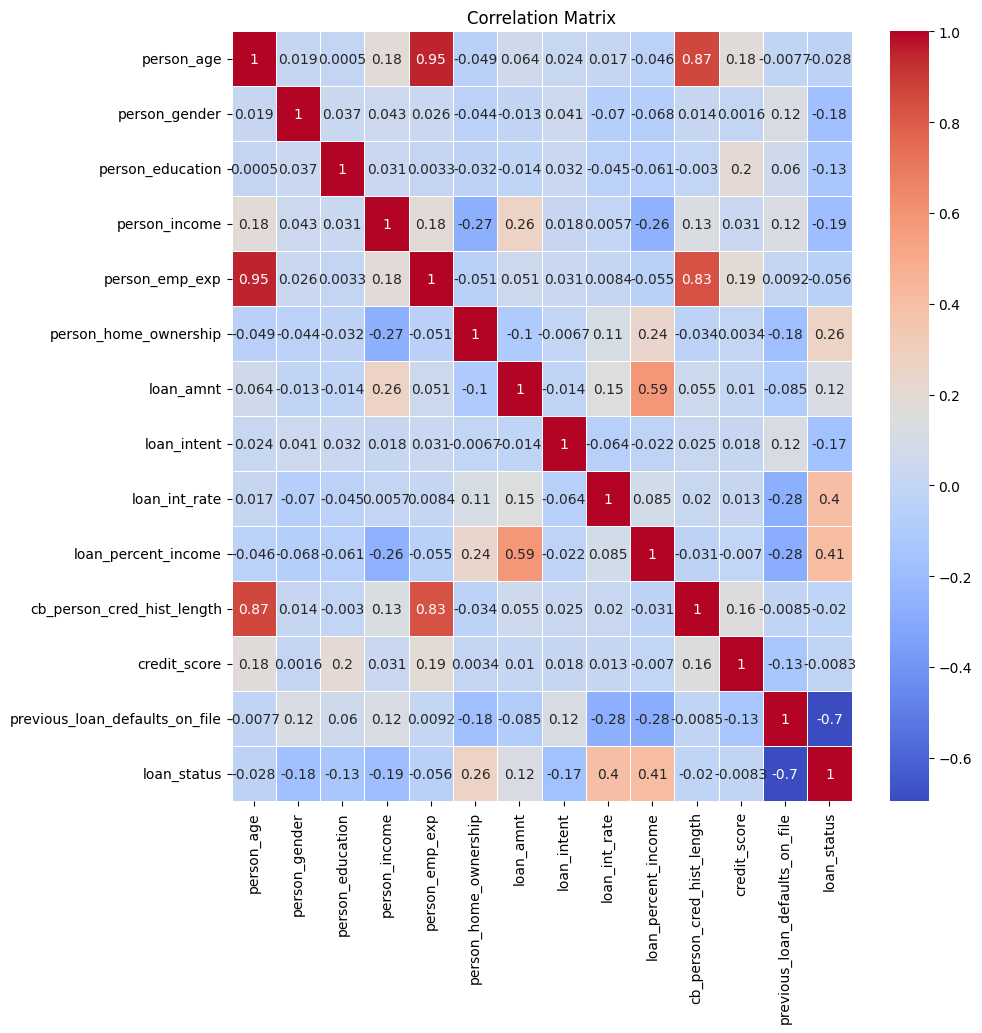

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr,annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
loan_corr = df_corr['loan_status'].sort_values(ascending = False)
loan_corr

,loan_status
loan_status,1.000000
loan_percent_income,0.405947
loan_int_rate,0.397588
person_home_ownership,0.264358
loan_amnt,0.120961
credit_score,-0.008288
cb_person_cred_hist_length,-0.019582
person_age,-0.028306
person_emp_exp,-0.055592
person_education,-0.128218


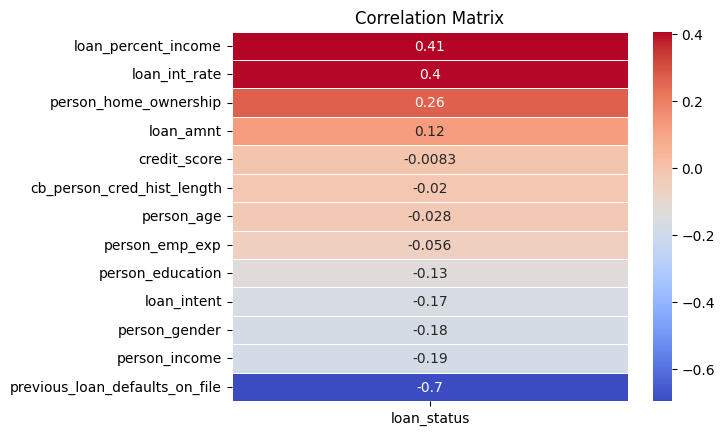

In [21]:
loan_corr = loan_corr.drop('loan_status')
sns.heatmap(loan_corr.to_frame(),annot = True, cmap = 'coolwarm', linewidth = 0.5, annot_kws={'size':10})
plt.title('Correlation Matrix')
plt.show()

Taking values with more correlation than |0.2|

so taking **'previous_loan_defaults_on_file', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income'.**

In [22]:
df = df[['loan_percent_income', 'loan_int_rate', 'person_home_ownership', 'previous_loan_defaults_on_file', 'loan_status']]
df

,loan_percent_income,loan_int_rate,person_home_ownership,previous_loan_defaults_on_file,loan_status
0,0.490000,16.020000,3,0,1
1,0.080000,11.140000,2,1,0
2,0.440000,12.870000,0,0,1
3,0.440000,15.230000,3,0,1
4,0.530000,14.270000,3,0,1
...,...,...,...,...,...
69995,0.539061,11.025770,3,0,1
69996,0.090000,14.711632,0,0,1
69997,0.290000,18.367998,0,0,1
69998,0.030000,10.543323,3,0,1


<Axes: >

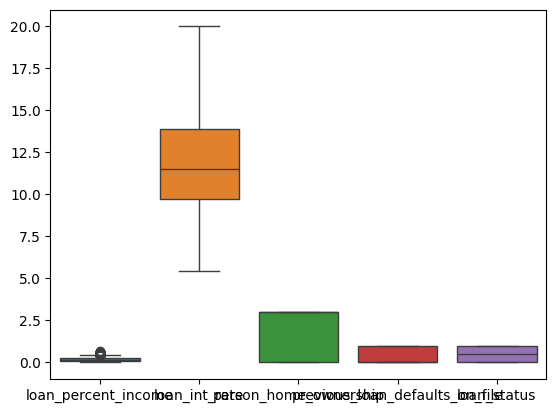

In [23]:
sns.boxplot(df)

# **Data Skewness**

All the features are having skewness so we have to remove the skewness inorder to get better data modeling.

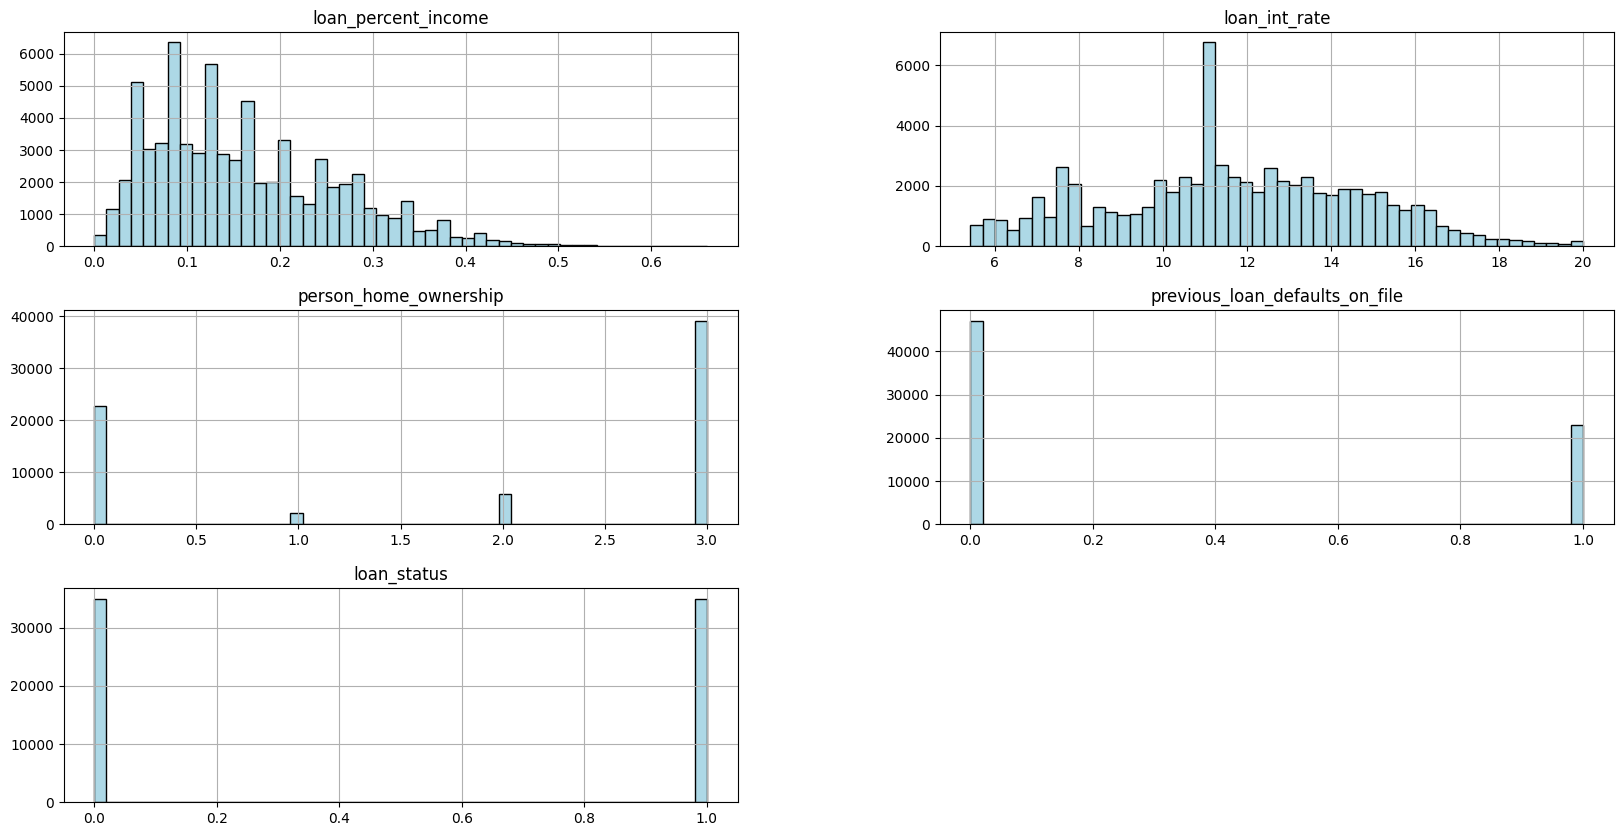

In [24]:
df.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

**Removing the skewness**

In [25]:
df['loan_percent_income'] = np.log1p(df['loan_percent_income'])
df['loan_int_rate'] = np.log1p(df['loan_int_rate'])

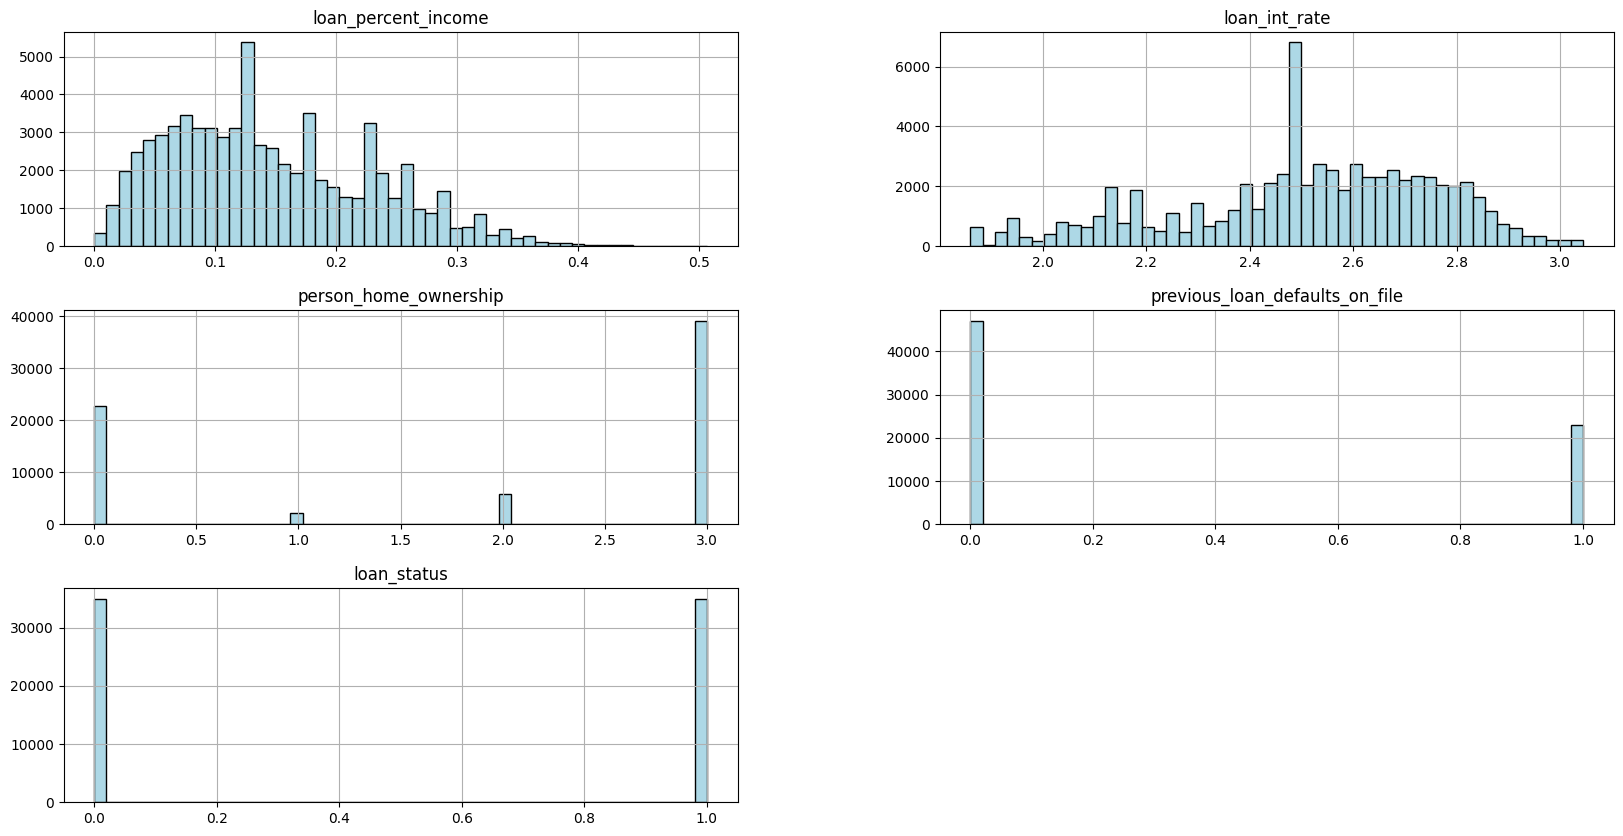

In [26]:
df.hist(color='lightblue',edgecolor='black',figsize=(20,10),bins=50)
plt.show()

In [27]:
df_z=df

## model training

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df_z[['loan_percent_income','loan_int_rate','person_home_ownership','previous_loan_defaults_on_file']]
y=df['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.86793


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      7023
           1       0.83      0.93      0.88      6977

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

------------------------------
Decision Tree accuracy: 0.88171


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7023
           1       0.90      0.86      0.88      6977

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

------------------------------
Random Forest accuracy: 0.88393


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      702

# ***Conclusion and Report***

---

***Random Forest accuracy: 0.88393***


***The analysis and classification using the Random Forest algorithm yielded an accuracy of 88.39%, demonstrating that the model is effective at predicting the target variable. The classification report reveals strong precision and recall scores for both classes, with a balanced performance across the dataset. Class 0 and Class 1 achieved F1-scores of 0.88, indicating that the model is reliable for practical use cases.***


1. **Accuracy**: 0.88393 (88.4%)  
   - The overall percentage of correctly classified instances is impressive.

2. **Precision**:  
   - For class 0: 0.88 (88%)  
   - For class 1: 0.89 (89%)  
   Precision indicates the model’s ability to avoid false positives. The values are balanced between the two classes.

3. **Recall**:  
   - For class 0: 0.89 (89%)  
   - For class 1: 0.88 (88%)  
   Recall shows how well the model identifies all positive instances, with both classes performing similarly.

4. **F1-Score**:  
   - For class 0: 0.89 (89%)  
   - For class 1: 0.88 (88%)  
   F1-score balances precision and recall, showing consistent performance across both classes.

5. **Support**:  
   - The dataset is balanced between the two classes, with nearly equal numbers of samples for each (7023 and 6977).

# **Outlier detection and removing**

In [29]:
# sns.boxplot(df)

In [30]:
def remove_outliers_iqr(df, exclude_column):
    data = df.copy()  # Create a copy of the DataFrame
    for col in data.columns:
        if col == exclude_column or not pd.api.types.is_numeric_dtype(data[col]):
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove rows with outliers in the current column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df_cleaned = remove_outliers_iqr(df, exclude_column='loan_status')
df=df_cleaned
df_pca=df
df_min=df
df_out=df


dfa=df

**when using outlier detection the final model is getting negatively influenced.**

<Axes: >

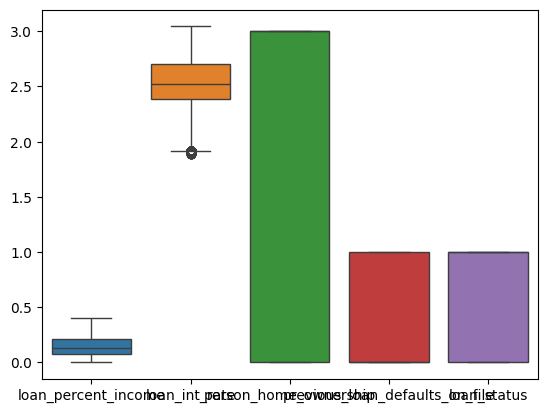

In [31]:
sns.boxplot(df)

## **Model training**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df_out[['loan_percent_income','loan_int_rate','person_home_ownership','previous_loan_defaults_on_file']]
y=df['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.86283


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      6841
           1       0.82      0.93      0.87      6996

    accuracy                           0.86     13837
   macro avg       0.87      0.86      0.86     13837
weighted avg       0.87      0.86      0.86     13837

------------------------------
Decision Tree accuracy: 0.87497


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6841
           1       0.90      0.85      0.87      6996

    accuracy                           0.87     13837
   macro avg       0.88      0.88      0.87     13837
weighted avg       0.88      0.87      0.87     13837

------------------------------
Random Forest accuracy: 0.87888


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      684

# **Data scaling**

## Minmax scalar

In [33]:
from sklearn.preprocessing import MinMaxScaler

features = df_min.drop('loan_status', axis=1)

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled data, using the correct index
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index) # Use features.index instead of data.index

# You can now use 'scaled_df' for further analysis or modeling
df_min= scaled_df

## **model training**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df_min[['loan_percent_income','loan_int_rate','person_home_ownership','previous_loan_defaults_on_file']]
y=df['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.86247


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      6841
           1       0.82      0.93      0.87      6996

    accuracy                           0.86     13837
   macro avg       0.87      0.86      0.86     13837
weighted avg       0.87      0.86      0.86     13837

------------------------------
Decision Tree accuracy: 0.87548


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6841
           1       0.90      0.85      0.87      6996

    accuracy                           0.88     13837
   macro avg       0.88      0.88      0.88     13837
weighted avg       0.88      0.88      0.88     13837

------------------------------
Random Forest accuracy: 0.87895


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      684

# **PCA**

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['person_home_ownership','loan_int_rate','loan_percent_income','previous_loan_defaults_on_file']
scaler = StandardScaler().fit_transform(df_pca[features])


# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Choose the desired number of components
pca_result = pca.fit_transform(scaler)


# Add PCA results to the DataFrame
df_pca['pca1'] = pca_result[:, 0]
df_pca['pca2'] = pca_result[:, 1]

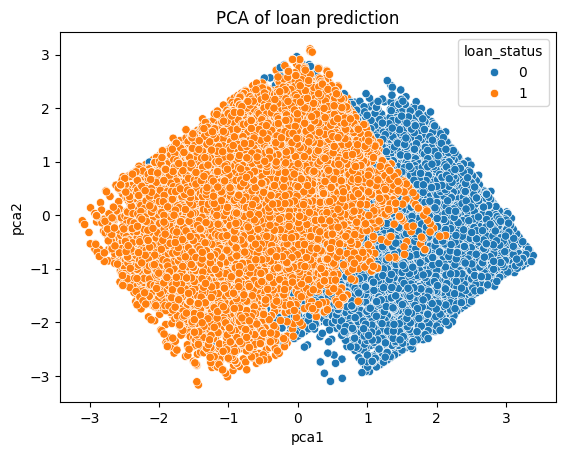

In [36]:
# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2',hue = 'loan_status', data=df_pca)
plt.title('PCA of loan prediction')
plt.show()

## **model training**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x=df_pca[['pca1','pca2']]
y=dfa['loan_status']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} accuracy: {accuracy:.5f}')
    print()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression accuracy: 0.85293


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6841
           1       0.84      0.88      0.86      6996

    accuracy                           0.85     13837
   macro avg       0.85      0.85      0.85     13837
weighted avg       0.85      0.85      0.85     13837

------------------------------
Decision Tree accuracy: 0.83537


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      6841
           1       0.86      0.80      0.83      6996

    accuracy                           0.84     13837
   macro avg       0.84      0.84      0.84     13837
weighted avg       0.84      0.84      0.84     13837

------------------------------
Random Forest accuracy: 0.85915


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      684